## Importing Libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import statistics

## Assingment: Part 1
> Corrupting the Image by randomly choosing the pixels from the choosen Image & replacing the values with random or junk value.

In [2]:
img_BGR = cv2.imread('10.jpg', 1)
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB) #Flipping the color Channel BGR to RGB

In [3]:
def corrupting_image(lst, noisy_img_RGB, required_no_cordinates):
    for i in range(required_no_cordinates):
        a, b = random.randint(0, lst[0] - 1), random.randint(0, lst[1] - 1)
        pix0, pix1, pix2 = random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)
        noisy_img_RGB[a, b] = (pix0, pix1, pix2)
        
    return noisy_img_RGB

In [4]:
type(img_RGB)
lst = img_RGB.shape
total_size = lst[0] * lst[1] 
required_no_cordinates = int(0.5 * (total_size)) #selecting 5% cordinates randomly from total number of cordinates
noisy_img_RGB = corrupting_image(lst, img_RGB, required_no_cordinates) #calling courrupting_image function

## Assingment: Part 2
>Displaying the Corrupted Image

Text(0.5, 1.0, 'Corrupted Image')

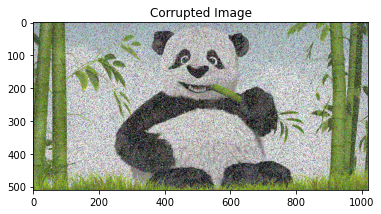

In [5]:
plt.imshow(noisy_img_RGB)
plt.title('Corrupted Image')

Text(0.5, 1.0, 'Original Image')

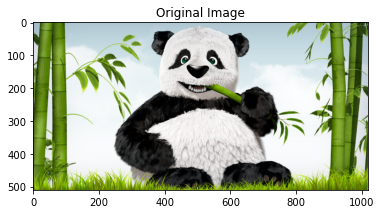

In [6]:
img_BGR1 = cv2.imread('11.jpg', 1)
img_RGB1 = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB) #Flipping the color Channel BGR to RGB
plt.imshow(img_RGB1)
plt.title('Original Image')

## Assignment: Part 3 & 4 (Denoising the Image)
>Part 3: Read in the saved noisy images. Identify the noisy pixels by comparing them with neighboring pixels.

>Part 4: Replace the "noisy pixels" identified in part 3 with mean and median of the neighboring pixels. Consider different "neighborhoods". Display the "denoised" images.

## Implementing different filtering methods
>Here we are Identifying the noisy pixels by comparing them with neighbor pixels using the application of Mean (average) & Median Filtering, & replacing the corrupted pixels with Mean & Median of neighbor pixels. By using different thresholding value, we're trying to get the Image cleared & denoised.

### Mean Filtering
> The idea of mean filtering is simply to replace each pixel value in an image with the mean (`average') value of its neighbors, including itself. This has the effect of eliminating pixel values which are unrepresentative of their surroundings. Mean filtering is usually thought of as a convolution filter

In [7]:
def clearing_image(input_image, thresh, neighbour_matrix): #Implementation Mean Filter
    neighbour_matrix = 3
    outImage = input_image.copy()
    for k in range(3):
        for i in range(lst[0]-2*(neighbour_matrix - 2)):
            for j in range(lst[1]-2*(neighbour_matrix - 2)):
                avg = (1/9) * (int(outImage[(i, j, k)]) +
                                       int(outImage[(i + 1, j, k)]) +
                                       int(outImage[(i + 2, j, k)]) + 

                                       int(outImage[(i, j + 1, k)]) + 
                                       int(outImage[(i + 1, j + 1, k)]) + 
                                       int(outImage[(i +2, j + 1, k)]) +

                                       int(outImage[(i, j + 2, k)]) + 
                                       int(outImage[(i + 1, j + 2, k)]) +
                                       int(outImage[(i + 2, j + 2, k)])
                                       )
                        
                diff = abs(avg - int(outImage[(i+1,j+1,k)]))
                
                if diff > thresh:
                    outImage[(i+1, j+1, k)] = avg
                
                
    return outImage

#### Checked for various threshold Values

Text(0.5, 1.0, 'Mean, Thresh = 100, Filter Size = 3')

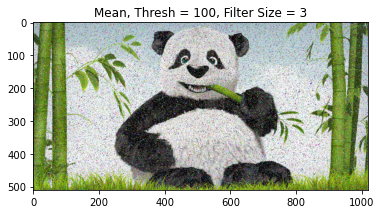

In [8]:
clear_Avg_1 = clearing_image(noisy_img_RGB, thresh = 100, neighbour_matrix = 3)
plt.imshow(clear_Avg_1) #Image with reduced Noise via Mean Filter
plt.title('Mean, Thresh = 100, Filter Size = 3')

Text(0.5, 1.0, 'Mean, Thresh = 50, Filter Size = 3 ')

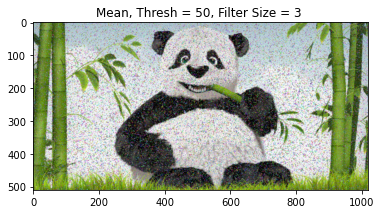

In [9]:
clear_Avg_2 = clearing_image(noisy_img_RGB, thresh = 50, neighbour_matrix = 3)
plt.imshow(clear_Avg_2) #Image with reduced Noise via Mean Filter 
plt.title('Mean, Thresh = 50, Filter Size = 3 ') #Noise can be more reduce by using 5 * 5 Neighbour Matrix

Text(0.5, 1.0, 'Mean, Thresh = 80, Filter Size = 3 ')

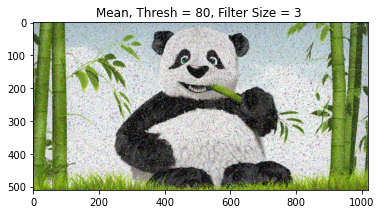

In [10]:
clear_Avg_3 = clearing_image(noisy_img_RGB, thresh = 80 , neighbour_matrix = 3) #Inbetween threshold 50 & 100 it will give more better Image
plt.imshow(clear_Avg_3) #Image with reduced Noise via Mean Filter 
plt.title('Mean, Thresh = 80, Filter Size = 3 ') #Noise can be more reduce by using 5 * 5 Neighbour Matrix

### Median Filtering 
> The median filter is a non-linear digital filtering technique, often used to remove noise from an image or signal. Such noise reduction is a typical pre-processing step to improve the results of later processing.

In [11]:
def clearing_image_median(input_image, thresh, neighbour_matrix):
    neighbour_matrix = 3
    outImage = input_image.copy()
    for k in range(3):
        for i in range(lst[0]-2*(neighbour_matrix - 2)):
            for j in range(lst[1]-2*(neighbour_matrix - 2)):
                medVal = statistics.median([int(outImage[(i, j, k)]),
                                                    int(outImage[(i+1, j, k)]),
                                                    int(outImage[(i+2, j, k)]),

                                                    int(outImage[(i, j+1, k)]),
                                                    int(outImage[(i+1, j+1, k)]),
                                                    int(outImage[(i+2, j+1, k)]),

                                                    int(outImage[(i, j+2, k)]),
                                                    int(outImage[(i+1, j+2, k)]),
                                                    int(outImage[(i+2, j+2, k)])
                                                    ])
                if medVal > thresh:
                    outImage[(i+1, j+1, k)] = medVal
                    
    return outImage


#### Checked for various threshold Values

Text(0.5, 1.0, 'Median, Thresh = 100, Filter Size = 3')

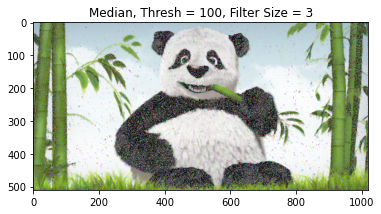

In [12]:
clear_Med_2 = clearing_image_median(noisy_img_RGB, thresh = 100, neighbour_matrix = 3)
plt.imshow(clear_Med_2)
plt.title('Median, Thresh = 100, Filter Size = 3') #it gives us more clear & Smooth Image with Filter Size = 5, Basically with 5 * 5 Neighbour Matrix

Text(0.5, 1.0, 'Median, Thresh = 50, Filter Size = 3')

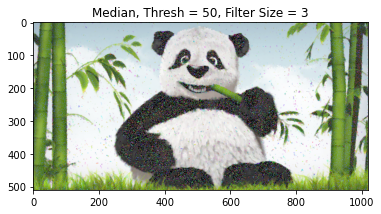

In [13]:
clear_Med_2 = clearing_image_median(noisy_img_RGB, thresh = 50, neighbour_matrix = 3)
plt.imshow(clear_Med_2)
plt.title('Median, Thresh = 50, Filter Size = 3') #it gives us more clear & Smooth Image with Filter Size = 5, Basically with 5 * 5 Neighbour Matrix

#### We can see that the median filtered Image considerably enhanced with hardly any salt and pepper noise in it. 
#### Most Denoised Image

Cleared Image


Text(0.5, 1.0, 'Median, Thresh = 35, Filter Size = 3, Cleared')

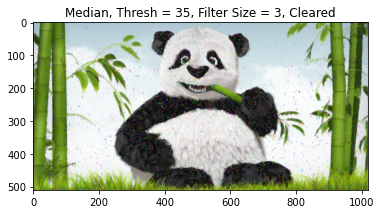

In [14]:
#Most Denoised Image
clear_Med_1 = clearing_image_median(noisy_img_RGB, thresh = 10, neighbour_matrix = 3)
plt.imshow(clear_Med_1)
print ("Cleared Image")
plt.title('Median, Thresh = 35, Filter Size = 3, Cleared') #it gives us more clear & Smooth Image with Filter Size = 5, Basically with 5 * 5 Neighbour Matrix